### In this notebook, we would perform Exploratory Data Analysis on UCI Adult Dataset

## Importing all the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Dataset contains data of nearly 32 thousand values of different people residing in the US in 1994 and their personal details like Workclass, nationality among others.

The Data is not ordered properly, so we need to first Extract the names of the columns and then the dataset.

In [3]:
name_cols = []
with open('adult.names') as file:
    for f in file.readlines():
        if not str(f).startswith('|') and ':' in str(f):
            name_cols.append(str(f).split(':')[0])
name_cols.append('Salary')

In [4]:
df = pd.read_csv('adult.data', names=name_cols)

Basic Analysis of the Dataset : 

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [12]:
object_cols = []
for i, enum in enumerate(df.dtypes):
    if enum=='object':
        object_cols.append(i)

for i in range(len(object_cols)):
    object_cols[i] = df.dtypes.index[object_cols[i]]
    
print("No. of non integer type Features : ",len(object_cols))

No. of non integer type Features :  9


So the dataset does not contain any null values and has 9 non integer type features. The number of unique values is as below.

In [14]:
for i in object_cols:
    print(i)
    print(df[i].nunique(), " Unique Values")
    print(" ")

workclass
9  Unique Values
 
education
16  Unique Values
 
marital-status
7  Unique Values
 
occupation
15  Unique Values
 
relationship
6  Unique Values
 
race
5  Unique Values
 
sex
2  Unique Values
 
native-country
42  Unique Values
 
Salary
2  Unique Values
 


The dataset that we imported has prevailing whitespaces in object columns. So we remove them.

In [15]:
def correct_names(name):
    if name.startswith(" ") or name.endswith(" "):
        return name.strip(" ")
    else:
        return name

for i in object_cols:
    df[i] = df[i].apply(correct_names)

Let's check the unique values in each object data type feature

In [16]:
#  Country of origin for person. This is nominal attribute.
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [17]:
# The highest level of education achieved for that individual. This is nominal attribute.
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [18]:
# The descriptions of the individuals race. This is nominal attribute.
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [19]:
# Marital status of the individual. This is nominal attribute.
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [20]:
# The occupation of the individual. This is nominal attribute.
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [21]:
# The family relationship of the individual. This is nominal attribute.
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [22]:
# Biological Sex. This is nominal attribute
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [23]:
# The workclass the prson belongs to. This is a nominal attribute
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Now Let's see the Graphical visualization of the Data

In [28]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Salary', ylabel='age'>

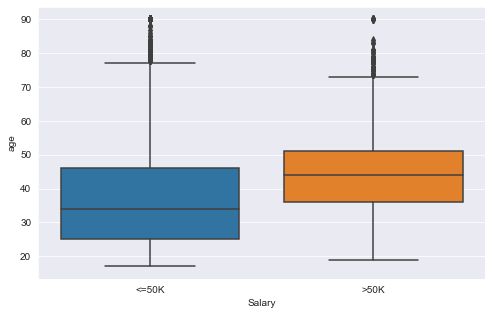

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Salary', y='age', data=df)

There are a lot of outliers in the age column, which can not be interpreted using boxplot.
Let's check the skewness for the same.

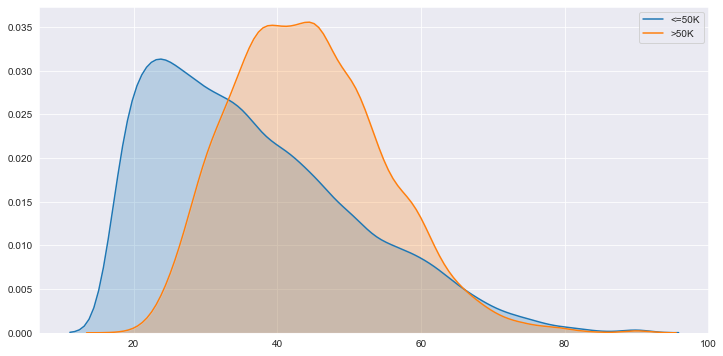

In [37]:
ls = df['Salary'].unique()
plt.figure(figsize=(12,6))
ax = plt.axes()
plt.legend(ls)
for l in ls: 
    sns.kdeplot(df[df['Salary'] == l]['age'], shade=True, ax=ax, label=l)

The age data is right skewed, as most of the data lies on the left side of the density plot, so we would change this distribution to a Standard Normal Distribution while training and also predicting.

<AxesSubplot:title={'center':'Female'}, xlabel='Salary', ylabel='age'>

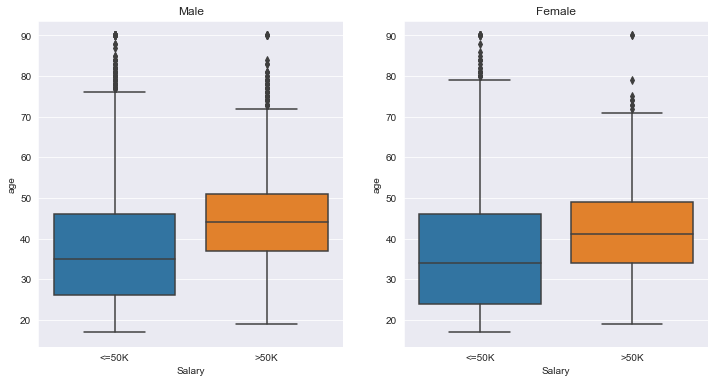

In [41]:
# Age distribution for different genders.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Male")
sns.boxplot(x='Salary', y='age', data=df[df['sex']=='Male'])
plt.subplot(1,2,2)
plt.title("Female")
sns.boxplot(x='Salary', y='age', data=df[df['sex']=='Female'])

So we infer from the above figures that most of the entries with Salary >50k are from people aging 40 and above, irrespective of the gender

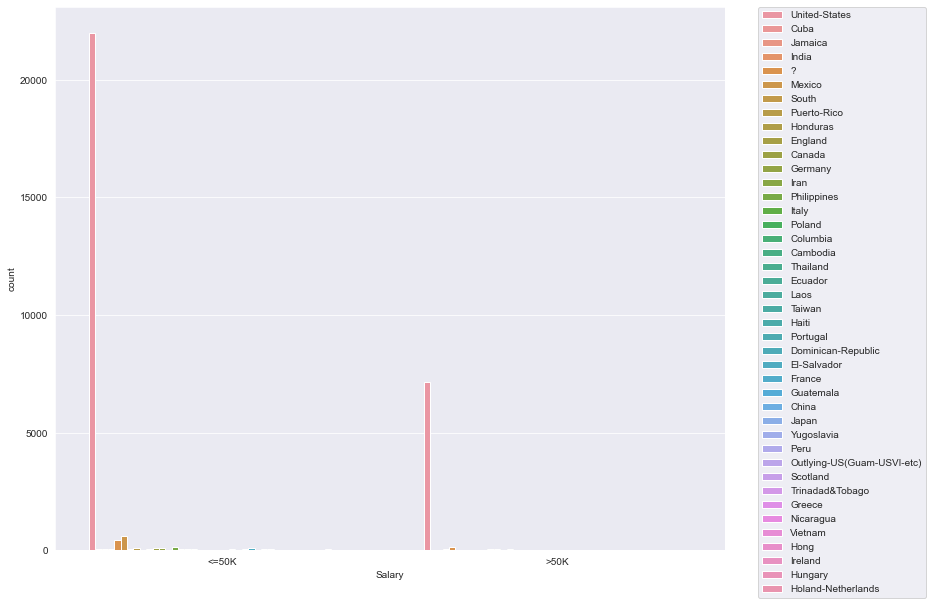

In [44]:
plt.figure(figsize=(12,10))
sns.countplot(x="Salary", data=df, hue="native-country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Since there are a lot of Native Countries(i.e., 42), we can not infer anything from this graph and some of the values are just unknown(=='?').

One thing we can do is to reduce the number of unique values.

I reduced the number of unique values to 20 based on how many entries from each country have Salary=">50K"

In [45]:
native_country_new = df[df['Salary']==">50K"]['native-country'].value_counts().index[:20]
def get_country(name):
    if name not in native_country_new or name=='?':
        return "Others"
    else:
        return name

df['native-country'] = df['native-country'].apply(get_country)

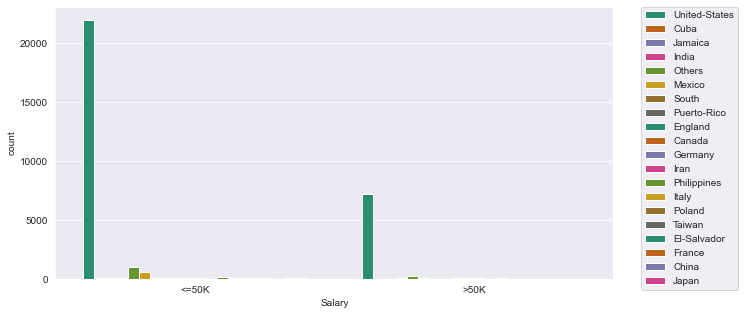

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x="Salary", data=df, hue="native-country", palette='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The highest number of Entries are from US. So people from the US have a very higher probability of getting more than 50K per annum.

<AxesSubplot:xlabel='Salary', ylabel='count'>

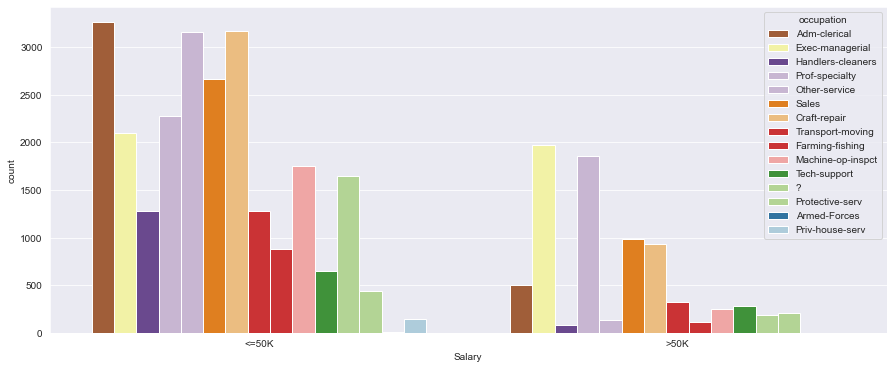

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x="Salary", data=df , hue="occupation", palette='Paired_r')

"Prof-specialty" and "Exec-managerial" are the 2 most common jobs for getting salary greater than 50K per annum. So people working in these fields have a very higher probability of getting more than 50K per annum.

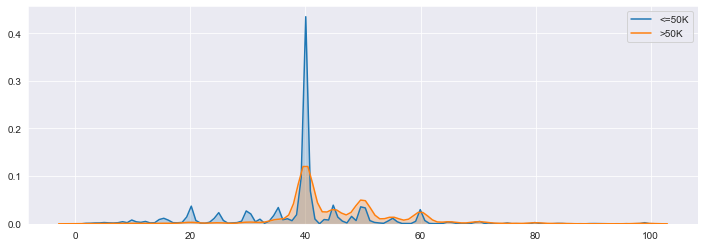

In [58]:
# Hours worked per week. This is continuous attribute.
ls = df['Salary'].unique()
plt.figure(figsize=(12,4))
ax = plt.axes()
plt.legend(ls)
for l in ls: 
    sns.kdeplot(df[df['Salary'] == l]['hours-per-week'], shade=True, ax=ax, label=l)

<AxesSubplot:xlabel='race', ylabel='count'>

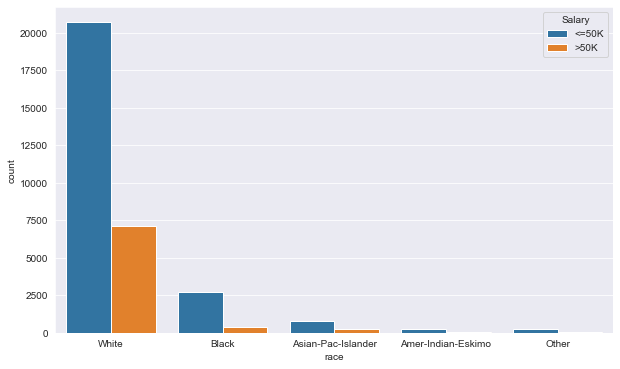

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(df['race'], hue=df['Salary'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

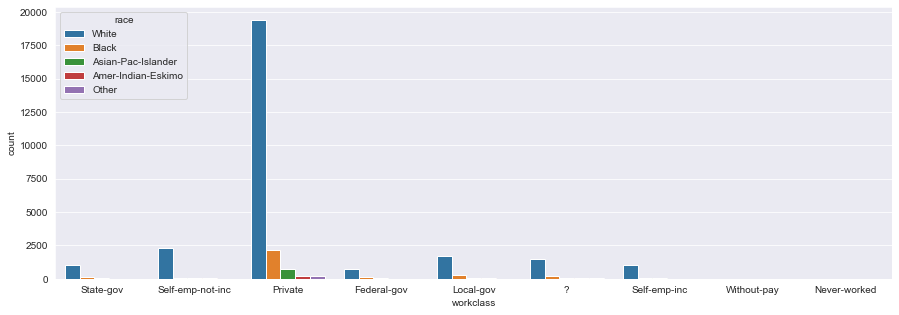

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(df['workclass'], hue=df['race'])

In terms of Size, the "Asian-Pac-Islander" race has a good population of them getting Salary greater than 50K.

<AxesSubplot:xlabel='education', ylabel='count'>

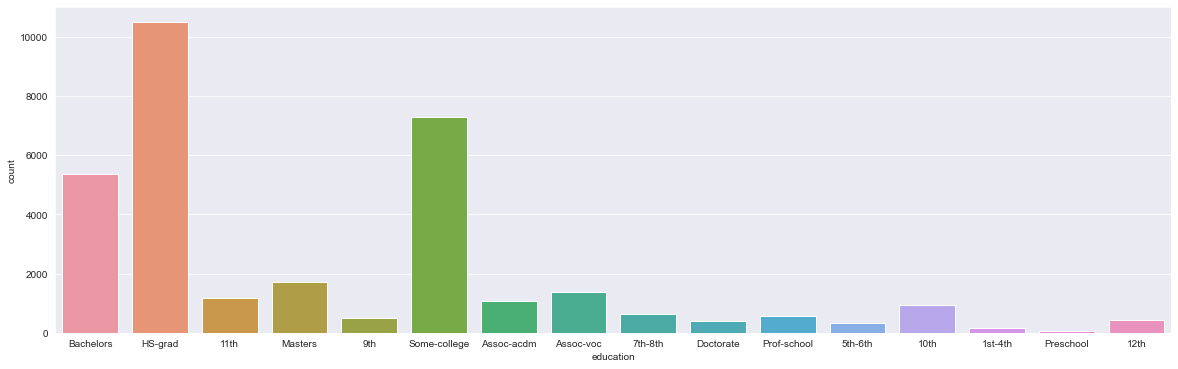

In [62]:
plt.figure(figsize=(20,6))
sns.countplot(df['education'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

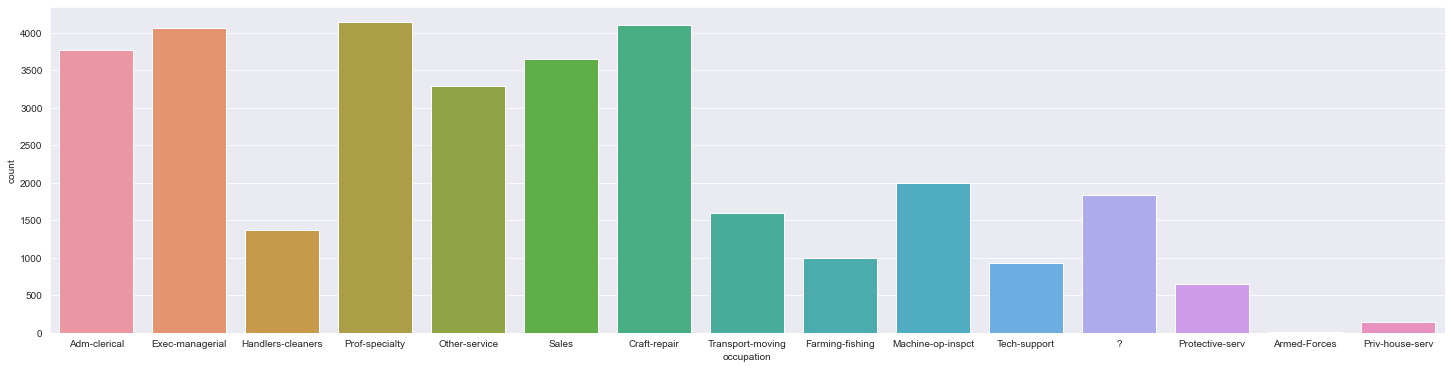

In [63]:
plt.figure(figsize=(25,6))
sns.countplot(df['occupation'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

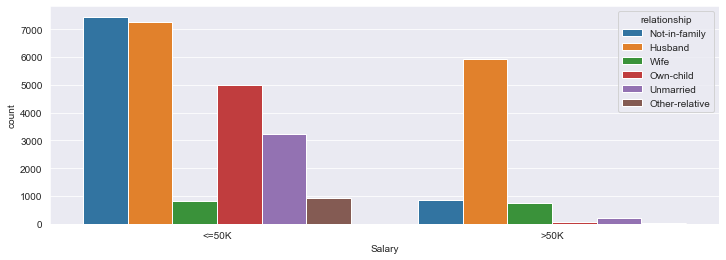

In [66]:
plt.figure(figsize=(12,4))
sns.countplot(x="Salary", data=df, hue="relationship")

People who are Not in family are the most common in having Salary less than 50K, while the people who belongs to the Relationship group "Husbands" are most common in having Salary moe than 50K.

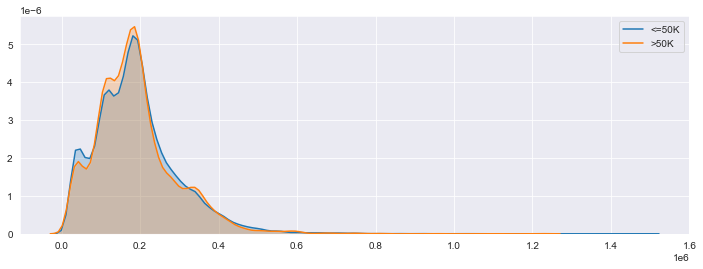

In [67]:
# - fnlwgt – The number of people the census takers believe that observation represents.
ls = df['Salary'].unique()
plt.figure(figsize=(12,4))
ax = plt.axes()
plt.legend(ls)
for l in ls: 
    sns.kdeplot(df[df['Salary'] == l]['fnlwgt'], shade=True, ax=ax, label=l)

The fnlwgt data is also right skewed.

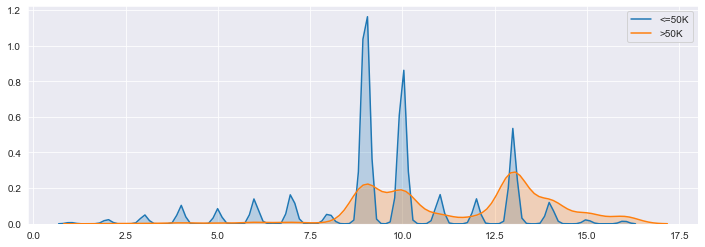

In [68]:
# - education_num – Highest level of education in numerical form. This is continuous attribute.
ls = df['Salary'].unique()
plt.figure(figsize=(12,4))
ax = plt.axes()
plt.legend(ls)
for l in ls: 
    sns.kdeplot(df[df['Salary'] == l]['education-num'], shade=True, ax=ax, label=l)

<AxesSubplot:xlabel='count', ylabel='workclass'>

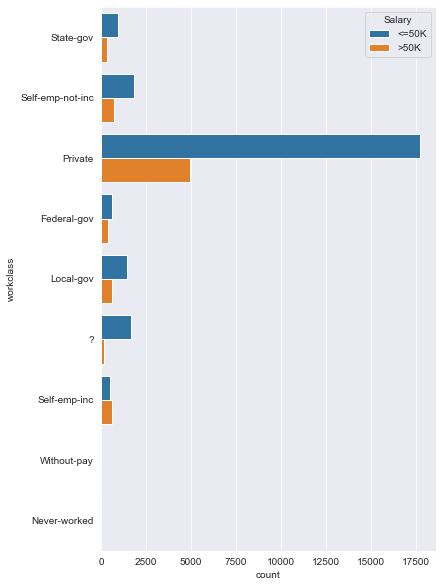

In [71]:
plt.figure(figsize=(6,10))
sns.countplot(y='workclass', hue='Salary', data=df)

'Self-emp-inc' has the highest percentage of people having Salary>50K among their sample space. Peopl working in government jobs also contribute a high percentage in people with Salary>50K.

<AxesSubplot:xlabel='count', ylabel='marital-status'>

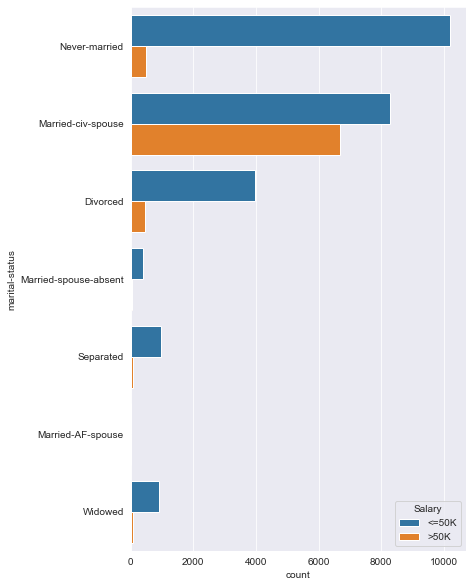

In [72]:
plt.figure(figsize=(6,10))
sns.countplot(y='marital-status', hue='Salary', data=df)

"Married-civ-spouse" or married civillian spouse have more probability of getting salary more than 50K per annum.

In [73]:
df.groupby('Salary')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
Salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


In [75]:
df.groupby(by='Salary')['capital-gain'].describe()

,count,mean,std,min,25%,50%,75%,max
Salary,,,,,,,,
<=50K,24720.0,148.752468,963.139307,0.0,0.0,0.0,0.0,41310.0
>50K,7841.0,4006.142456,14570.378951,0.0,0.0,0.0,0.0,99999.0


In [76]:
df.groupby(by='Salary')['capital-loss'].describe()

,count,mean,std,min,25%,50%,75%,max
Salary,,,,,,,,
<=50K,24720.0,53.142921,310.755769,0.0,0.0,0.0,0.0,4356.0
>50K,7841.0,195.001530,595.487574,0.0,0.0,0.0,0.0,3683.0


Let's binarize the Salary column to make a heatmap of correlations for the dataset

In [77]:
df['Salary'] = np.where(df['Salary']==">50K", 1, 0)

In [78]:
corr_mat = df.corr()

<AxesSubplot:>

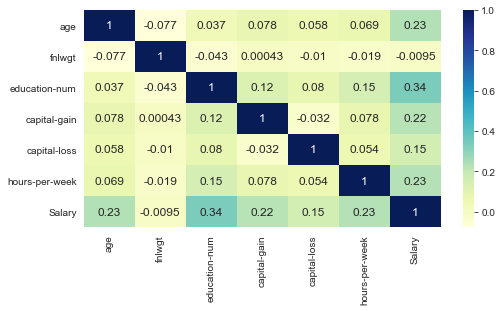

In [81]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_mat, cmap = "YlGnBu", annot = True, annot_kws = {"size": 12})